De acuerdo al cuestionario del lunes, ustedes respondieron "Respuestas", usando Respuestas y Random_nums responde la siguientes preguntas

In [2]:
import random
import numpy as np

In [3]:
Respuestas = ["6","pi","Lentes","5","8","11",
              "10000000","3.1416","1","8","53",
              "58","5","raízde2","8","99","$",
              "Pi","6","9","10","7",".-.","11",
              "70","13","10","28","159","37"]

np.random.seed(42)

Random_nums = np.random.randint(0,10000000,len(Respuestas))

Hipótesis: La mediana de esos números es 10.

Usando boostraping ¿qué nivel de confianza debes usar para que se acepte la hipótesis?

 **Limpieza de datos**

In [4]:
import pandas as pd

In [5]:
df = pd.Series(Respuestas)
df

0            6
1           pi
2       Lentes
3            5
4            8
5           11
6     10000000
7       3.1416
8            1
9            8
10          53
11          58
12           5
13     raízde2
14           8
15          99
16           $
17          Pi
18           6
19           9
20          10
21           7
22         .-.
23          11
24          70
25          13
26          10
27          28
28         159
29          37
dtype: object

In [6]:
len(df)

30

In [7]:
for i in range(len(df)):
  try: 
    df[i] = int(df[i])
  except:
    df[i] = None
df

0            6
1         None
2         None
3            5
4            8
5           11
6     10000000
7         None
8            1
9            8
10          53
11          58
12           5
13        None
14           8
15          99
16        None
17        None
18           6
19           9
20          10
21           7
22        None
23          11
24          70
25          13
26          10
27          28
28         159
29          37
dtype: object

In [8]:
df = df[df.notnull()].dropna()


# Obten los siguientes estadísticos

Media

Mediana

Desviación est.

Min

Max

In [9]:
df.mean()

434809.652173913

In [10]:
df.median()

10.0

In [11]:
df.std()

2085138.2456459596

In [12]:
df.min()

1

In [13]:
df.max()

10000000

# Outliers

Utilizando el z-score y el rango intercuartil, ¿Cuáles son los outiers de los datos? Grafícalo con un diagrama de caja

In [83]:
IQR = np.percentile(df, 75) - np.percentile(df, 25)
IQR

37.5

In [84]:
import seaborn as sns

In [85]:
df2 = df.to_frame()


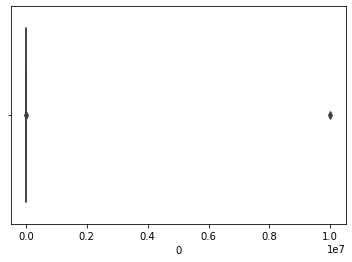

In [86]:
sns.boxplot(x = df2[0], data = df2)

In [87]:
# El único outlier es el 10000000

Eliminar el outlier de 1000000 porque el grafico de boxplot no nos arrojaba nada consistente al ser un número muy alejado a la serie de numeros que veniamos manejando

In [88]:
df2

,0
0,6
3,5
4,8
5,11
6,10000000
8,1
9,8
10,53
11,58
12,5


In [98]:
df2 = df2.reset_index()
df2 = df2[0]

In [99]:
df2.iloc[4]

1

In [100]:
df2.drop(axis=0, index=4, inplace = True)
df2

0       6
1       5
2       8
3      11
5       8
6      53
7      58
8       5
9       8
10     99
11      6
12      9
13     10
14      7
15     11
16     70
17     13
18     10
19     28
20    159
21     37
Name: 0, dtype: object

In [101]:
df2 = df2.to_frame()

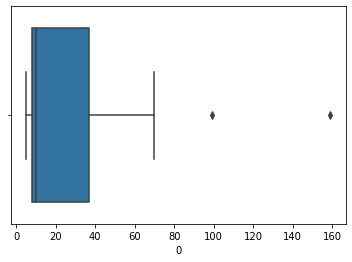

In [102]:
sns.boxplot(x = df2[0], data = df2)

In [58]:
# Observación, eliminando el outlier 10000000, se obtuvo la gráfica anterior

Z-Score sin el dato de 1000000


In [103]:
df2

,0
0,6
1,5
2,8
3,11
5,8
6,53
7,58
8,5
9,8
10,99


In [63]:
# z standarization es para normalizar los datos para poder definir si sobrepasan o no un umbral ( tambien se pueden usar para comparar variables X con Y)
threshold = 2.0
mean = df2.mean()
std = df2.std()
outlier = []
for i in df2[0]:
    z = ((i-mean)/std)[0]
    if z > threshold or z < - threshold:
        outlier.append(i)
print('', outlier)


 [159]


In [124]:
#Al tener a 159 como outlier despues de quitar el 1000000 podemos hacer bootstraping con numeros entre 0 y 159

In [80]:
np.random.seed(22)

random_nums = list(np.random.randint(0,159,len(df3)))
random_nums

[117,
 132,
 44,
 100,
 102,
 84,
 136,
 146,
 14,
 45,
 93,
 34,
 127,
 8,
 133,
 111,
 27,
 84,
 29,
 81,
 38]



Pregunta Extra (usnado p-value): ¿Si lanzo una moneda 6 veces y las 6 veces sale "Águila", es un evento "normal"?


In [111]:
rand=pd.DataFrame(random_nums)
rand

,0
0,117
1,132
2,44
3,100
4,102
5,84
6,136
7,146
8,14
9,45


In [115]:
conc=pd.concat([df2,rand], axis=0)
conc

,0
0,6
1,5
2,8
3,11
5,8
6,53
7,58
8,5
9,8
10,99


In [117]:
conc.mean()

0    54.904762
dtype: float64

In [118]:
conc.median()

0    37.5
dtype: float64

In [119]:
conc.mode()

,0
0,8


In [121]:
conc.std()

0    48.87356
dtype: float64

In [122]:
conc.min()

0    5
dtype: object

In [123]:
conc.max()

0    159
dtype: object

In [120]:
#(1/64)+(1/64)=0.03125
#si el valor es menor a 0.05 entonces  rechaza la hipotesis y no se cumple, por lo que 6 veces aguila se clasificaría como un evento raro